### Firstname Lastname

## COM110 Lab8: Language Analysis
### dict, set, tuple, list, str
<img src="https://resilienteducator.com/wp-content/uploads/2015/09/Revising-With-Pictures-How-Word-Clouds-Help-Students-Become-Better-Writers.jpg" width="700">
(c) 2023 Timothy Becker, Department of Computer Science <br><br>
<img src="https://www.conncoll.edu/media/website-media/visualidentity/images/1Line-LogoSig-Color.jpg" width="200">

### Preface
We can analysis texts in a computational manner thus providing a different set of insights than those which we gather by reading and applying critical thought to the texts. Here we will use several plays in text form as the input for our analysis and we will look into these texts and ask questions about the words being used: which ones are used most and least frequently, which ones appear together often? Using this analysis framework you can dig even deeper into the word choices of authors along with higher level features such as tone. To get started we will first make use of some text processing in order to chop the text portion of the text into str data types. This lab will then make use of the CH11 data structures to provide some interesting and novel analysis that a human reader would have difficulty performing (without the use of a computer).


### [Part 1 20 pts] Processing text and counting occurrences
First, we will read in and process the plays. the read_and_process function below will perform some heavy lifting for you to chop off the ACTs, Scenes, the speaker name, the empty lines, the punctuations and other artifacts. This will provide the text in word form with spaces separating. You will then proceed by using string processing tools and will make use of data structures. The following text processing code illustrates how easy it is (or just powerful) to process raw text in python. There really is now need in a language like this to have to use libraries to read txt, csv, tsv or any other structure text form (.xls is another story)


In [2]:
import re #pattern matching library look at re.sub(r'\([^)]*\)','',line) it removes ()

def read_and_process_text(path):
    raw = []
    with open(path,'r') as f:
        raw = [line.replace('\n','') for line in f.readlines()]
        if '\n'.join(raw).find(' ACT ')>=0:
            i = 0                                    
            for i in range(len(raw)):              
                if raw[i].startswith('ACT '): break  
            raw = raw[i:]

    data = []
    for line in raw:
        if not (line.startswith('ACT') or line.startswith('=') or line.startswith('Scene')):
            chunk = re.sub(r'\[[^)]*\]','',re.sub(r'\([^)]*\)','',line)).replace('--','').replace('\'','').replace('\t','')
            if chunk!='': 
                data += [chunk.replace('(','').replace(')','').replace('[','').replace(']','').replace(';','').replace(':','')]

    filt = []
    for line in data:
        first = line.split(' ')[0]
        if len(first)>1 and first==first.upper():  #more than a single char in uppercase=> I it is a speaker
            chunk = line.replace(first,'').strip() #replace the speaker name with empty string then clear away the leading space!
            if chunk!='': filt += [chunk]
        else: filt += [line]
    text = ' '.join(re.split('[.!?]',' '.join(filt).replace(',','').replace('"','').replace(':','')))
    text = re.sub(' +',' ',text)             #clear away runs of spaces
    text = re.sub(r'[^\x00-\x7F]','', text) #remove wierd unicode characters
    return text

lear = read_and_process_text('king_lear_shakespeare.txt')
lear[:1000]

FileNotFoundError: [Errno 2] No such file or directory: 'king_lear_shakespeare.txt'

#### [Exercise 1a]
Get all the unique words in the King Lear play. How many words are used here?  Does number of words indicate anything in a play? You can use sets here and are not permitted any libraries. Splitting the result of the read_and_process_text will give you text that can be split on the space.

In [1]:
#Exercise 1a code here
len(set(lear.split(" ")))

NameError: name 'lear' is not defined

#### [Exercise 1b]
Now get the frequency of each word in the King Lear play using loops and dictionaries. You are not permitted to use any libraries here. This idea was shown in class for counting letters in a string. Here you should break the string into words and then use the whole word as a dict key.

In [2]:
#[Example 1] how to count individual letter in a string s

s = "Any text can be put here. Each character will be counted up by this algorithm!"

D = {}            #start with an empty dictionary, they have K:V pairs, usually a str, int or tuple
for x in s:       #loop on each char of the string s
    if x in D:    #check for membership in D (this is very fast O(1) operations unlike a list which takes O(n))
        D[x] += 1 #since the key is in D, use the key to access the value in D => D[x] is the value of key x in dictionary D
    else:
        D[x] = 1  #there is no key so this will add the key x, value 1 to the dictionary D
        
print(D)          #print dict

{'A': 1, 'n': 3, 'y': 2, ' ': 14, 't': 7, 'e': 7, 'x': 1, 'c': 5, 'a': 5, 'b': 3, 'p': 2, 'u': 3, 'h': 5, 'r': 4, '.': 1, 'E': 1, 'w': 1, 'i': 3, 'l': 3, 'o': 2, 'd': 1, 's': 1, 'g': 1, 'm': 1, '!': 1}


In [3]:
# we can also reorder our results using the frequencies we calculated above
E = {} #make a new dict
sorted_keys = sorted(D,key=lambda x: D[x]) #sorted the dictionary keys by the value: aka the frequicies/ints
sorted_keys = sorted_keys[::-1]            #sorted is ascending so we reverse the list
for k in sorted_keys:                      #loop through the keys
    E[k] = D[k]                            #and no reorder the keys in D into our new dict E
D = E                                      #swap the object references from E to D
print(D)

D = {k:D[k] for k in sorted(D,key=lambda x: D[x])[::-1]} #or do all the steps above in one line...
print(D)

{' ': 14, 'e': 7, 't': 7, 'h': 5, 'a': 5, 'c': 5, 'r': 4, 'l': 3, 'i': 3, 'u': 3, 'b': 3, 'n': 3, 'o': 2, 'p': 2, 'y': 2, '!': 1, 'm': 1, 'g': 1, 's': 1, 'd': 1, 'w': 1, 'E': 1, '.': 1, 'x': 1, 'A': 1}
{' ': 14, 't': 7, 'e': 7, 'c': 5, 'a': 5, 'h': 5, 'r': 4, 'n': 3, 'b': 3, 'u': 3, 'i': 3, 'l': 3, 'y': 2, 'p': 2, 'o': 2, 'A': 1, 'x': 1, '.': 1, 'E': 1, 'w': 1, 'd': 1, 's': 1, 'g': 1, 'm': 1, '!': 1}


In [ ]:
#Exercise 1b code here

### [Part 2 20pts] Looking for common patterns of language across pairs of documents in a corpus (text collection)
Here we have several other Shakespear plays that we can analysis. In Part1 we loaded King Lear, now we will load Merchant of Venice [all plays can be found here](https://www.folger.edu/explore/shakespeares-works/).

In [4]:
merchant = read_and_process_text('the_merchant_of_venice_shakespeare.txt')
merchant[:1000]

'The Merchant of Venice by William Shakespeare Edited by Barbara A Mowat and Paul Werstine with Michael Poston and Rebecca Niles Folger Shakespeare Library https//shakespeare folger edu/shakespeares-works/the-merchant-of-venice/ Created on Jul 31 2015 from FDT version 0 9 2 Characters in the Play an heiress of Belmont her waiting-gentlewoman Servants to Portia BALTHAZAR STEPHANO Suitors to Portia Prince of MOROCCO Prince of ARRAGON a merchant of Venice a Venetian gentleman suitor to Portia Companions of Antonio and Bassanio SOLANIO SALARINO GRATIANO LORENZO servant to Bassanio a Jewish moneylender in Venice his daughter another Jewish moneylender GOBBO servant to Shylock and later to Bassanio GOBBO Lancelets father a messenger from Venice Jailer Duke of Venice Magnificoes of Venice Servants Attendants and followers Messenger Musicians In sooth I know not why I am so sad It wearies me you say it wearies you But how I caught it found it or came by it What stuff tis made of whereof it is 

Two important things we may want to know here are what are the common words and what are the words that are unique to each play. In other words what words do these play share? What words are unique to each play? Before you begin coding, take a look through the text files which are designed to be human readable texts and think critically about this question.

#### [Exercise 2a] Human Read and guess common/unique words

Here you will simply read each text (King Lear and Merchant of Venice) for around 5-10 minutes and brain storm some ideas of which words you think will be common and which will be unique. You can use the python lists that are started below to put at least 10 of your ideas for each.

In [5]:
#Exercise 2a ideas here using human reading only!!!

common = [] 
unique = []

#### [Exercise 2b] Looking for patterns using our dictionary (and python3 skills)
Now do the same thing as above but write a program to do it you can use the idea shown below which will demonstrate how to find the common characters of two strings as well as those characters that are unique to each string. Another name for common elements of two sets is called set intersection: $S\bigcap T$, while the elements unique to S given T is called set difference: $S\setminus T$, while the elements unique to T given S is: $T\setminus S$. Notice how the set difference is non-symmetric, the set on the left hand side gets any intersected elements with T removed.

In [5]:
#find common chars of two strings s and t
s = "Hello world how are you? I am fine of course, for now..."
t = "This COM110 class sure is fun!"

union  = sorted(set(s).union(set(t)))
inter  = sorted(set(s).intersection(set(t)))
s_diff = sorted(set(s).difference(set(t)))
t_diff = sorted(set(t).difference(set(s)))

print(union)
print(inter)
print(s_diff)
print(t_diff)

[' ', '!', ',', '.', '0', '1', '?', 'C', 'H', 'I', 'M', 'O', 'T', 'a', 'c', 'd', 'e', 'f', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 'u', 'w', 'y']
[' ', 'a', 'c', 'e', 'f', 'h', 'i', 'l', 'n', 'r', 's', 'u']
[',', '.', '?', 'H', 'I', 'd', 'm', 'o', 'w', 'y']
['!', '0', '1', 'C', 'M', 'O', 'T']


### [Part 3] More advanced text processing. Removing super common words: stoplist

Now we will construct a set of the most common words across all the texts in the interest of solving the following problem: Given several text from multiple authors, what are the most common words? In other words, we will build a word frequency function and then subtract the high frequency words from a text we want to analyze. What will be left will be words that are more descriptive and unique to the source.

In [39]:
#example frequency counting functionadapted from part 1 for chars in a string
def freq(s):
    D = {}
    for x in s:
        if x in D: D[x] += 1
        else:      D[x]  = 1
    return {k:D[k] for k in sorted(D,key=lambda x: D[x])[::-1]}

pride = read_and_process_text('pride_and_prejudice.txt')
pride[:1000]

'The Project Gutenberg eBook of Pride and Prejudice This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever You may copy it give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www gutenberg org If you are not located in the United States you will have to check the laws of the country where you are located before using this eBook Title Pride and Prejudice Author Jane Austen Release date June 1 1998 Most recently updated April 14 2023 Language English Credits Chuck Greif and the Online Distributed Proofreading Team at http//www pgdp net START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE Illustration GEORGE ALLEN PUBLISHER 156 CHARING CROSS ROAD LONDON RUSKIN HOUSE Illustration _Reading Janes Letters _ _Chap 34 _ PRIDE and PREJUDICE by Jane Austen with a Preface by George Saintsbury and Illustrations by Hugh Thomson Ruskin 156

### [Exercise 3a] Find the top X frequency words

Modify the freq function above [you can call it freq_x(s,top):] to work on words instead of characters and also give it a new parameter that is an integer value called top which will return the highest frequency words. Notice how the code in the return statement in freq give you all the words starting with the highest frequency? Well you can slice that to get the top values:

In [22]:
#if you have a dictionary of chars or words with frequencies as values...

topall = {k:D[k] for k in sorted(D,key=lambda x: D[x])[::-1]}      #gives a new dict with all values sorted by freq
top10  = {k:D[k] for k in sorted(D,key=lambda x: D[x])[::-1][:10]} #gives the top ten
top20  = {k:D[k] for k in sorted(D,key=lambda x: D[x])[::-1][:20]} #now it is the top 20
print(top20)

{' ': 14, 'e': 7, 't': 7, 'h': 5, 'a': 5, 'c': 5, 'r': 4, 'l': 3, 'i': 3, 'u': 3, 'b': 3, 'n': 3, 'o': 2, 'p': 2, 'y': 2, '!': 1, 'm': 1, 'g': 1, 's': 1, 'd': 1}


In [ ]:
#[Exercise 3a code here

### [Exercise 3b] Now subtract the top words

If you function is working, you can now test it out by removing those words from a given text. Some ideas are outlined below.

In [40]:
D = freq(pride)
D.pop(' ') #leave the spaces...
top5 = {k:D[k] for k in sorted(D,key=lambda x: D[x])[::-1][:5]}
top5 #get the top10 high frequency letters

for k in top5:
    pride = pride.replace(k,'') #remove the high frequency
pride[:1000]

'Th Prjc Gubrg Bk f Prid d Prjudic This bk is fr h us f y ywhr i h Uid Ss d ms hr prs f h wrld   cs d wih lms  rsricis whsvr Yu my cpy i giv i wy r r-us i udr h rms f h Prjc Gubrg Lics icludd wih his bk r li  www gubrg rg If yu r  lcd i h Uid Ss yu will hv  chck h lws f h cury whr yu r lcd bfr usig his Bk Til Prid d Prjudic Auhr J Aus Rls d Ju 1 1998 Ms rcly updd April 14 2023 Lgug Eglish Crdis Chuck Grif d h Oli Disribud Prfrdig Tm  hp//www pgdp  START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE Illusri GEORGE ALLEN PUBLISHER 156 CHARING CROSS ROAD LONDON RUSKIN HOUSE Illusri _Rdig Js Lrs _ _Chp 34 _ PRIDE d PREJUDICE by J Aus wih  Prfc by Grg Sisbury d Illusris by Hugh Thms Ruski 156 Chrig Hus Crss Rd Ld Grg All CHISWICK PRESSCHARLES WHITTINGHAM AND CO TOOKS COURT CHANCERY LANE LONDON Illusri _T J Cmys Crr i ckwldgm f ll I w  his fridship d dvic hs illusris r grfully iscribd_ _Hugh Thms_ _Wl Whim hs smwhr  fi d jus disici bw lvig by llwc d lvig wih prsl lv  This disici pplis  

In [ ]:
# [Exercise 3b] code here

#### [Extra Credit 10pts] Intersection of high frequency words

Ideally you want to subtract a common set of high frequency words. To do this you need to apply the freq_x function on every text. Take the top 100-500 words from each and then use set intersection to build your stoplist (negative dictionary of common high frequency words)

In [ ]:
# [Extra Credit]

#### [Part 4] Visualizing your efforts
This is the fun part, where you get to visualize the results of your processing in part [1],[2],[3] will make those items more understandable.  A common visualization method is called a word cloud. You will make a few of these to see the effects of our processing on the final cloud. There is a library to install either using the pip or conda command.

In [ ]:
%pip install wordcloud
#%conda install wordcloud #alterate way to install

#### [Exercise 4a] Regular Word cloud

For this one you should load the text for one of the plays, you don't have to chop it up, you can just call the read_and_process_text method which gives you all the text.

In [ ]:
# [Exercise 4a] code here

#### [Exercise 4b] word cloud with common words removed
Now use your common words (stop words) that you calculated in part 3. Play around with removing top 10,50,100, etc common words. You should see some of the smaller words in the picture become the larger ones if you remove enough of the common words. You can keep removing until the visualization shows words that are connected to the text.

In [ ]:
# [Exercise 4b] code here

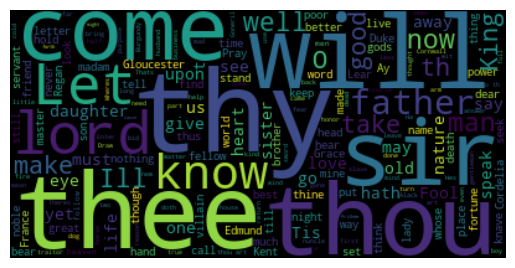

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = read_and_process_text('king_lear_shakespeare.txt') #text is just a string

# Example of how to use the wordcloud visualization tool!!
wc = WordCloud().generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### [5 20pts] Share your thoughts on the LAB.
Was this one more difficult than the last one? What was the most interesting thing you learned here in this material? Do you want to see a particuliar type or form of data in a future LAB?

your comments in markdown here